In [162]:
import numpy as np 
import pandas as pd


In [601]:
def initialize_parameters(layers_dims):  
    L = len(layers_dims)  
    parameters = {}
    for i in range(L-1):
        parameters['W'+str(i+1)] = np.random.randn(layers_dims[i+1], layers_dims[i])
        parameters['b'+str(i+1)] = np.zeros((layers_dims[i+1], 1))       
            
    return parameters

In [602]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    
    return A

In [603]:
def relu(Z):
    
    A = Z*(Z>0)
    
    return A

In [745]:
def forward_prop(x, parameters):
    caches = []
    A_prev = x 
    L = len(parameters)//2 +1   
    for i in range(1,L):
        Z = np.dot(parameters['W'+str(i)], A_prev) + parameters['b'+str(i)]
        A = sigmoid(Z)  #relu 
        caches.append((A_prev, Z))
        A_prev = A  
            
    return A, Z, caches
                

In [605]:
def compute_cost(AL, y):
    
    m = y.shape[1]
    cost = -np.sum(np.multiply(y, np.log(AL)) + np.multiply(1-y,np.log(1-AL)))/m
    
    return cost

In [737]:
def backward_prop(dAL, caches, parameters):
    
    L = len(caches)+1
    dA = dAL
    grad = {}
    for i in reversed(range(1, L)):
        A, Z = caches[i-1]
        dZ = dA * (sigmoid(Z)*(1-sigmoid(Z)))
        grad['dW'+str(i)] = np.dot(dZ, A.T)/m
        grad['db'+str(i)] = np.sum(dZ, axis=1, keepdims= True)/m
        dA = np.dot(parameters['W'+str(i)].T, dZ)
                
    return grad

In [613]:
def gradient_checking(A, activation):
    
    numeric_grad = {}
    if activation == 'sigmoid':
        J = None
    return None

In [706]:
def update_parameters(grad, parameters):
    
    L = len(parameters)//2
    
    for i in range(L):
        parameters['W'+str(i+1)] = parameters['W'+str(i+1)] - learning_rate*grad['dW'+str(i+1)] 
        parameters['b'+str(i+1)] = parameters['b'+str(i+1)] - learning_rate*grad['db'+str(i+1)]
                
    return parameters

In [762]:
def predict(x, parameters):
    L = len(parameters)//2 +1   
    A_prev = x
    for i in range(1,L):
        Z = np.dot(parameters['W'+str(i)], A_prev) + parameters['b'+str(i)]
        A = sigmoid(Z)  #relu 
        A_prev = A  
        
    return A

In [751]:
def L_layer_model(x, y, layers_dims, learning_rate=0.0075, itera=3000, print_cost=False):
    
    parameters = initialize_parameters(layers_dims)
    m = y.shape[1]
    costs = []
   

    for i in range(itera):
        
        #forward_prop with all sigmoid
        AL, ZL, caches = forward_prop(x, parameters)
        
        #compute cost
        cost = compute_cost(AL, y)
        
        #initialize cost
        dAL = -np.divide(y, AL)+np.divide(1-y, 1-AL)
        
        #backward_prop
        grad = backward_prop(dAL, caches, parameters)
    
        #update parameters
        parameters = update_parameters(grad, parameters)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        
        if i%100 == 0:
            costs.append(cost)
       
    plt.plot(costs)
    plt.show()
        
    return parameters    

In [752]:
train_x = np.random.randn(1, 20).reshape(1,20)
train_y = np.zeros((1, 20))
train_y[train_x>=0.1] = 1
train_y[train_x<0.1] = 0
train_y = train_y.reshape((1,20))
m = train_y.shape[1]
layers_dims = [1,3, 4,3,5,1]

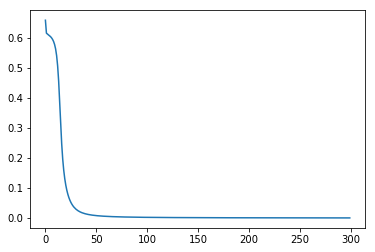

In [753]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate=0.0075, itera=30000, print_cost=False)


In [558]:
y_prob = A3
y_pred = np.zeros((1, y_prob.shape[1]))
y_pred[y_prob>=0.5] = 1
y_pred[y_prob<0.5] = 0
y_pred = np.squeeze(y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(np.squeeze(train_y), y_pred)

1.0

(2, 100)
(1, 100)


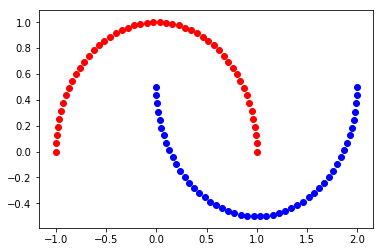

In [754]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')

X = X.T 
y = y.reshape((1, len(y)))
print (X.shape)
print (y.shape)

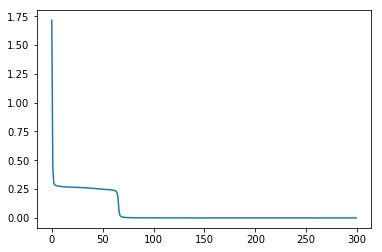

In [755]:
parameters = L_layer_model(X, y, layers_dims=[2, 3, 4, 5, 1], learning_rate=0.0075, itera=30000, print_cost=False)

In [763]:
y_prob = predict(X, parameters)


y_pred = np.zeros((1, y_prob.shape[1]))
y_pred[y_prob>=0.5] = 1
y_pred[y_prob<0.5] = 0
y_pred = np.squeeze(y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(np.squeeze(y), y_pred)

1.0